# **Neural network classificaton with tensorflow**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
import tensorflow as tf
import matplotlib.pyplot as plt

2024-07-18 21:53:19.862287: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-18 21:53:19.870972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 21:53:19.882433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 21:53:19.882466: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 21:53:19.891127: I tensorflow/core/platform/cpu_feature_gua

## **Create artificial dataset**

In [2]:
n_samples = 1000

In [3]:
X, y = make_circles(
    n_samples = n_samples,
    noise = 0.03,
    random_state = 42
)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], "label": y})

In [7]:

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


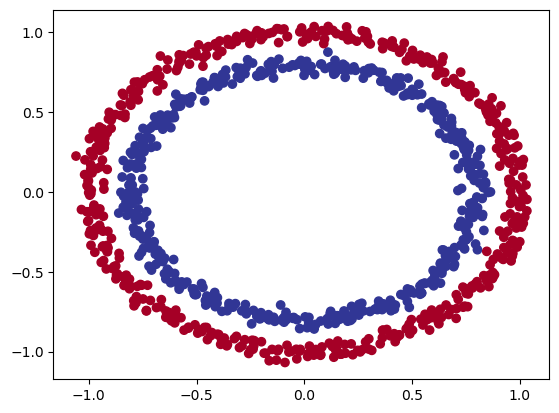

In [8]:
plt.scatter(x = circles.iloc[:, 0], y = circles.iloc[:, 1], c = circles.iloc[:, 2], cmap = 'RdYlBu');

## **Create initial model**

In [9]:
tf.keras.utils.set_random_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model_1.fit(
    x = X,
    y = y,
    epochs = 200,
)

2024-07-18 21:53:21.324584: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Epoch 1/200


2024-07-18 21:53:21.410921: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 21:53:21.410967: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 21:53:21.412864: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 21:53:21.412894: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 21:53:21.412909: I external/local_xla/xla/stream_executor

 1/32 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.4062 - loss: 6.6812

I0000 00:00:1721332402.020619  169713 service.cc:145] XLA service 0x7fa9b401a110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721332402.020697  169713 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-18 21:53:22.033332: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-18 21:53:22.055678: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721332402.138737  169713 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4387 - loss: 5.2495
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.5405 - loss: 4.9786
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.4906 - loss: 6.5521
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.5281 - loss: 6.1551
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.5182 - loss: 6.1637
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.5190 - loss: 6.1544
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.5125 - loss: 6.0204
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.4980 - loss: 6.0039
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.5028 - loss: 5.6614
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.4799 - loss: 4.2456
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.5135 - loss: 1.4064
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step -

In [10]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

## **Improve the model**

### **Add extra leayer**

In [11]:
tf.keras.utils.set_random_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 7.1205
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4246 - loss: 6.6184 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [12]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 7.8989


[7.971191883087158, 0.5]

### **Add extra layer; Change the optimizer**

In [13]:
tf.keras.utils.set_random_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_3.fit(
    x = X, 
    y = y,
    epochs = 100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4589 - loss: 4.0498
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.4678 - loss: 1.2576
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.4830 - loss: 0.7323
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.4830 - loss: 0.7087
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.4830 - loss: 0.6989
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.4830 - loss: 0.6959
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.4376 - loss: 0.6951
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.4500 - loss: 0.6949
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.4427 - loss: 0.6949
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.4508 - loss: 0.6950
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.4497 - loss: 0.6951
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

In [14]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5159 - loss: 0.6915


[0.6955134868621826, 0.49399998784065247]

### **Create plotting function**

In [15]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print('Multiclassification')
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('Binary classification')
        y_pred = y_pred.round().reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Binary classification


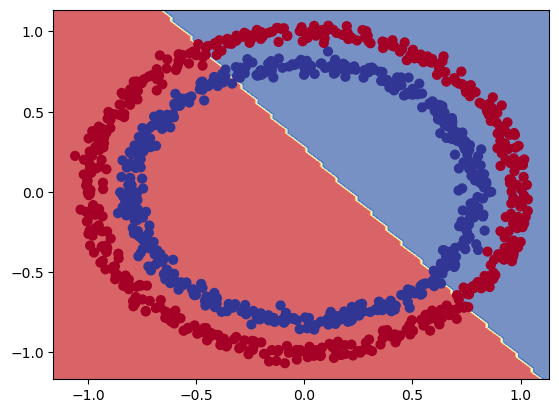

In [16]:
plot_decision_boundary(model_3, X, y)

### **Apply model 3 for regression problems**

#### **Generate datasets**

In [17]:
tf.keras.utils.set_random_seed(42)

# y = x + 10
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(10, 1010, 5)

#### **Split the datasets**

In [18]:
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [19]:
len(X_reg_train), len(X_reg_test), len(y_reg_train), len(y_reg_test)

(150, 50, 150, 50)

In [20]:
tf.keras.utils.set_random_seed(42)

model_3_reg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3_reg.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

model_3_reg.fit(
    x = tf.expand_dims(X_reg_train, axis = -1), 
    y = y_reg_train,
    epochs = 10
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 401.7897 - mae: 401.7897
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 283.4704 - mae: 283.4704 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 162.9053 - mae: 162.9053 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44.2691 - mae: 44.2691 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54.3895 - mae: 54.3895 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.1590 - mae: 50.1590 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.7310 - mae: 12.7310 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.8833 - mae: 23.8833 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.2368 - mae: 11.2368
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.6657 - mae: 10.6657 


In [21]:
y_reg_pred = model_3_reg.predict(X_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


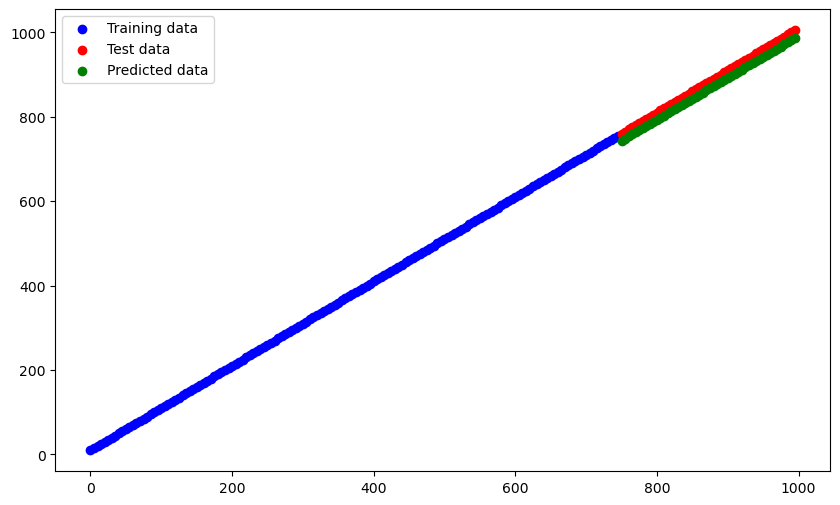

In [22]:
plt.figure(figsize = (10, 6))
plt.scatter(X_reg_train, y_reg_train, c = 'blue', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c = 'red', label = 'Test data')
plt.scatter(X_reg_test, y_reg_pred, c = 'green', label = 'Predicted data')
plt.legend();

### **Add some non-linearity**

In [23]:
tf.keras.utils.set_random_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1, activation = tf.keras.activations.linear)
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    # metrics = [tf.keras.metrics.binary_accuracy],
    metrics = ['accuracy']
)

history_4 = model_4.fit(
    x = X, 
    y = y,
    epochs = 100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4475 - loss: 5.9027 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4445 - loss: 5.8900 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4452 - loss: 5.8899 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4445 - loss: 5.8860 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4472 - loss: 5.8597 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 5.7345 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4453 - loss: 5.6604 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4449 - loss: 5.6259 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4450 - loss: 5.6092 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.4460 - loss: 5.5136
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.4470 - loss: 5.2122
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
Binary classification


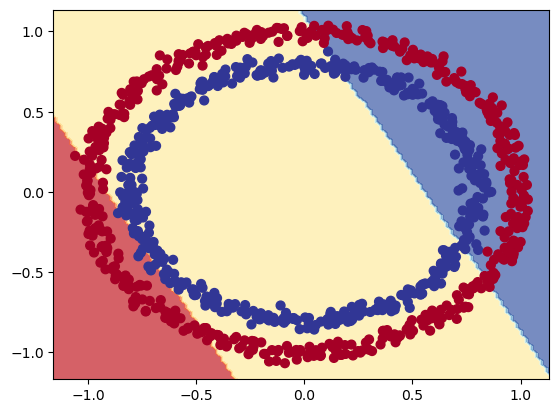

In [24]:
plot_decision_boundary(model_4, X, y)

In [25]:
tf.keras.utils.set_random_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 1),
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_5 = model_5.fit(
    x = X, 
    y = y,
    epochs = 100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4415 - loss: 3.5608
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4382 - loss: 1.4475 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4171 - loss: 1.3671
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4073 - loss: 1.3165 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3949 - loss: 1.2712 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3891 - loss: 1.2303 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3875 - loss: 1.1928 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3833 - loss: 1.1574 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3809 - loss: 1.1234 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.3796 - loss: 1.0932
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3865 - loss: 1.0643 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [26]:
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9176 - loss: 0.3354


[0.3309180736541748, 0.925000011920929]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Binary classification


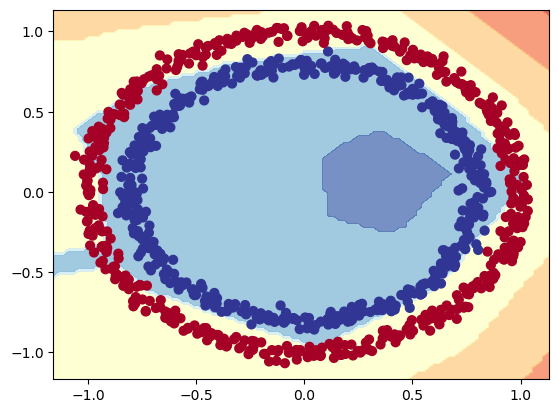

In [27]:
plot_decision_boundary(model_5, X, y)